In [3]:
import pandas as pd
orders = pd.read_csv("olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp'])
order_items = pd.read_csv("olist_order_items_dataset.csv")
# Merge on order_id
merged = pd.merge(order_items, orders, on='order_id')

# Filter only 'delivered' orders
merged = merged[merged['order_status'] == 'delivered']

# Select necessary columns
merged = merged[['order_purchase_timestamp', 'product_id', 'order_item_id']]
merged = merged.rename(columns={'order_purchase_timestamp': 'date', 'order_item_id': 'quantity'})


In [4]:
# Merge on order_id
merged = pd.merge(order_items, orders, on='order_id')

# Filter only 'delivered' orders
merged = merged[merged['order_status'] == 'delivered']

# Select necessary columns
merged = merged[['order_purchase_timestamp', 'product_id', 'order_item_id']]
merged = merged.rename(columns={'order_purchase_timestamp': 'date', 'order_item_id': 'quantity'})


In [5]:
# Remove timestamp, keep only date
merged['date'] = pd.to_datetime(merged['date']).dt.date

# Aggregate quantity sold
daily_sales = merged.groupby(['date', 'product_id']).agg({'quantity': 'sum'}).reset_index()

# Sort data
daily_sales = daily_sales.sort_values(['product_id', 'date'])

daily_sales.head()


,date,product_id,quantity
72819,2018-05-20,00066f42aeeb9f3007548bb9d3f33c38,1
39443,2017-12-12,00088930e925c41fd95ebfe695fd2655,1
41013,2017-12-21,0009406fd7479715e4bef61dd91f2462,1
86398,2018-08-01,000b8f95fcb9e0096488278317764d19,1
89048,2018-08-10,000b8f95fcb9e0096488278317764d19,1


In [6]:
top_products = daily_sales['product_id'].value_counts().head(5).index.tolist()
filtered_sales = daily_sales[daily_sales['product_id'].isin(top_products)]

filtered_sales.head()


,date,product_id,quantity
3251,2017-03-09,2b4609f8948be18874494203496bc318,1
3550,2017-03-13,2b4609f8948be18874494203496bc318,1
3645,2017-03-14,2b4609f8948be18874494203496bc318,3
3938,2017-03-17,2b4609f8948be18874494203496bc318,1
7642,2017-05-03,2b4609f8948be18874494203496bc318,1


In [9]:
filtered_sales = filtered_sales.copy()  # Avoid chained assignment issues
filtered_sales.loc[:, 'date'] = pd.to_datetime(filtered_sales['date'])
filtered_sales.loc[:, 'day'] = filtered_sales['date'].dt.day
filtered_sales.loc[:, 'month'] = filtered_sales['date'].dt.month
filtered_sales.loc[:, 'weekday'] = filtered_sales['date'].dt.weekday# Get top-selling product
product_id = filtered_sales['product_id'].value_counts().idxmax()
product_df = filtered_sales[filtered_sales['product_id'] == product_id].copy()
product_df = product_df.sort_values('date')


In [10]:
features = ['day', 'month', 'weekday']
target = 'quantity'

X = product_df[features]
y = product_df[target]


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [12]:
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📈 Evaluation Results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📈 Evaluation Results:
MAE: 0.95
RMSE: 1.15
R² Score: -0.05


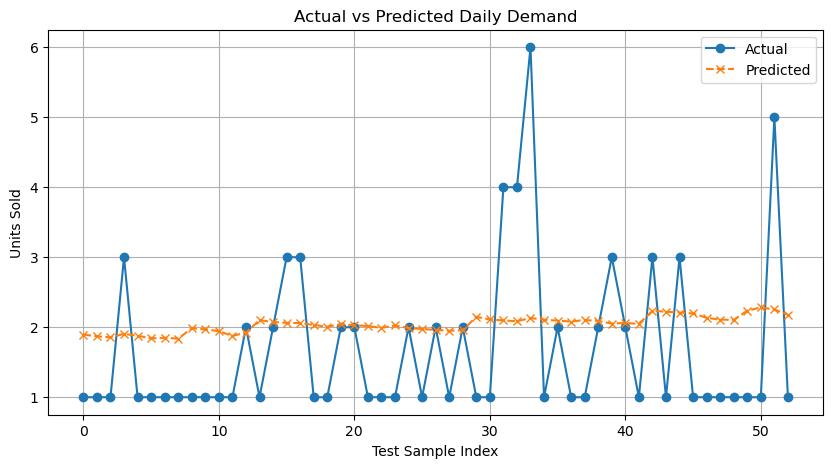

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', linestyle='--', marker='x')
plt.title('Actual vs Predicted Daily Demand')
plt.xlabel('Test Sample Index')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.show()
